In [ ]:
import pandas as pd
import numpy as np

# Set default crop type
CROP_TYPE = 'wheat'  # Default is corn, can be changed to 'soybean' or 'wheat'
US_DATASET_FILE = '../data/khaki_soybeans/khaki_multi_crop_yield.csv'
AG_DATASET_FILE = '../data/khaki_soybeans/khaki_wheat_argentina.csv'

DATASET_FILE = AG_DATASET_FILE if CROP_TYPE == 'wheat' else US_DATASET_FILE


In [84]:
# Load the dataset
df = pd.read_csv(DATASET_FILE)

# Get average yield by year
crop_yield_col = f"{CROP_TYPE}_yield"
yearly_yields = df.groupby('year')[crop_yield_col].mean().reset_index()
yearly_yields = yearly_yields.sort_values('year')


In [85]:
# Compute rolling mean and std for 5 years BEFORE current year
yearly_yields['rolling_mean'] = yearly_yields[crop_yield_col].shift(1).rolling(window=5, min_periods=5).mean()
yearly_yields['rolling_std'] = yearly_yields[crop_yield_col].shift(1).rolling(window=5, min_periods=5).std()
yearly_yields['z_score'] = (yearly_yields[crop_yield_col] - yearly_yields['rolling_mean']) / yearly_yields['rolling_std']
yearly_yields['abs_z_score'] = yearly_yields['z_score'].abs()

# Filter for 2000-2018 and sort by abs_z_score
result = yearly_yields[(yearly_yields['year'] >= 2000) & (yearly_yields['year'] <= 2018)].dropna()
result = result.sort_values('abs_z_score', ascending=False)

result.head(10)


,year,wheat_yield,rolling_mean,rolling_std,z_score,abs_z_score
30,2009,1986.910891,2560.531397,88.444827,-6.485631,6.485631
32,2011,3306.198157,2499.725393,291.734644,2.764405,2.764405
23,2002,1962.406417,2285.684130,118.270182,-2.733383,2.733383
24,2003,1922.248677,2252.533289,180.382425,-1.831024,1.831024
26,2005,2609.630208,2199.406972,239.679065,1.711552,1.711552
38,2017,3059.000000,2697.442470,252.824244,1.430075,1.430075
21,2000,2414.581921,2085.681411,244.035887,1.347755,1.347755
39,2018,2993.051724,2691.388557,241.191065,1.250723,1.250723
27,2006,2591.948598,2238.416629,293.325031,1.205257,1.205257
33,2012,3089.269565,2642.575305,469.121285,0.952194,0.952194


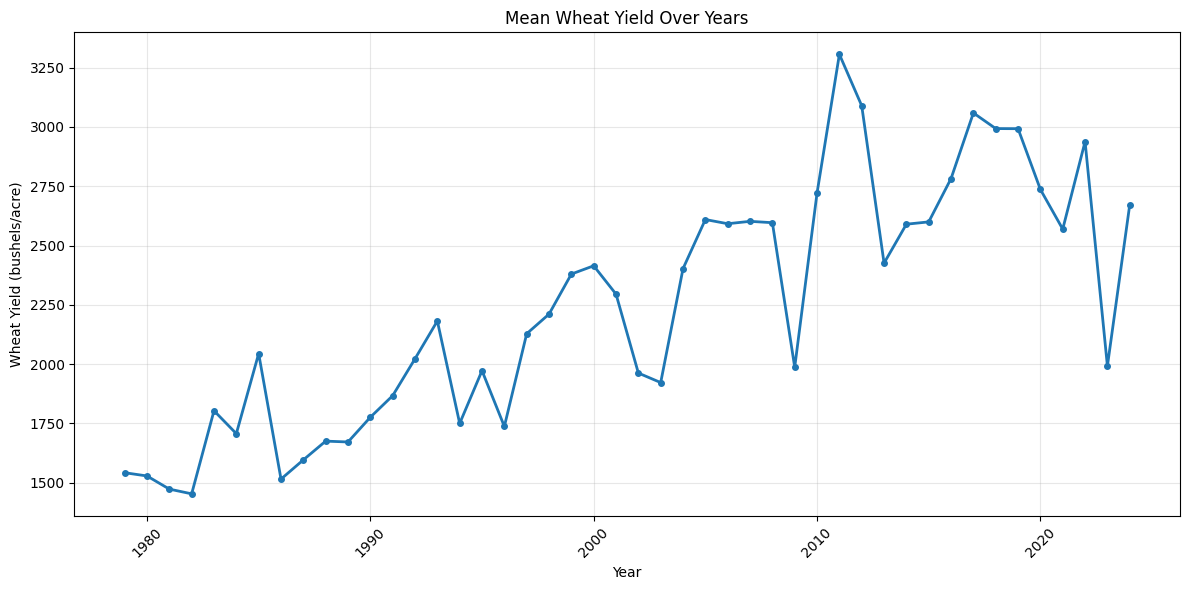

In [86]:
# Plot mean yield over the years
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(yearly_yields['year'], yearly_yields[crop_yield_col], marker='o', linewidth=2, markersize=4)
plt.title(f'Mean {CROP_TYPE.title()} Yield Over Years')
plt.xlabel('Year')
plt.ylabel(f'{CROP_TYPE.title()} Yield (bushels/acre)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
